Enter the number of processes: 5
Enter process name for P1: p1
Enter arrival hour for p1 (in 24-hour format): 17
Enter arrival minute for p1: 30
Enter burst time for p1: 5
Enter priority for p1 (lower number = higher priority): 3
Enter process name for P2: p2
Enter arrival hour for p2 (in 24-hour format): 17
Enter arrival minute for p2: 33
Enter burst time for p2: 1
Enter priority for p2 (lower number = higher priority): 2
Enter process name for P3: p3
Enter arrival hour for p3 (in 24-hour format): 17
Enter arrival minute for p3: 40
Enter burst time for p3: 11
Enter priority for p3 (lower number = higher priority): 4
Enter process name for P4: p4
Enter arrival hour for p4 (in 24-hour format): 17
Enter arrival minute for p4: 42
Enter burst time for p4: 5
Enter priority for p4 (lower number = higher priority): 1
Enter process name for P5: p5
Enter arrival hour for p5 (in 24-hour format): 17
Enter arrival minute for p5: 45
Enter burst time for p5: 12
Enter priority for p5 (lower number = 

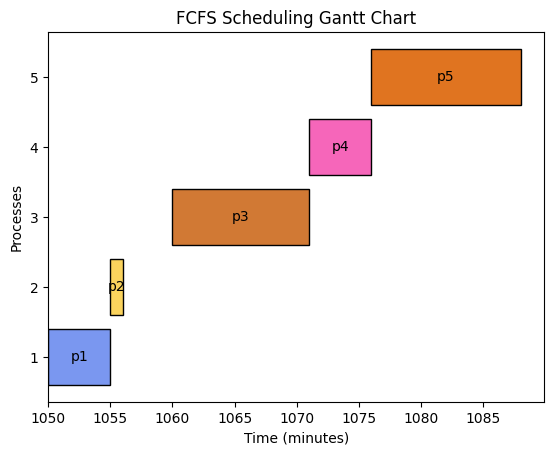

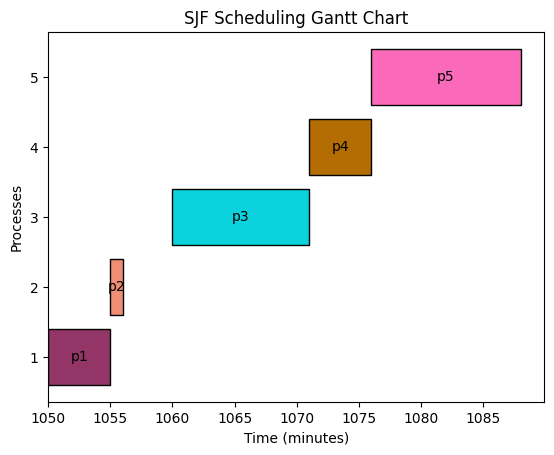

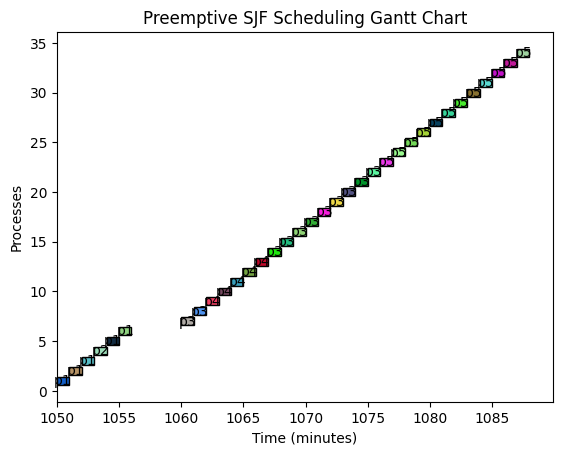

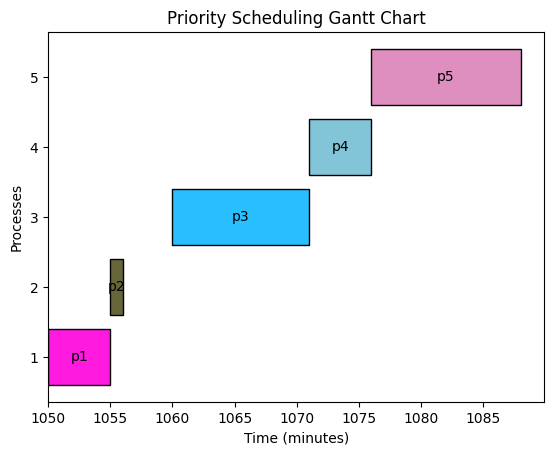

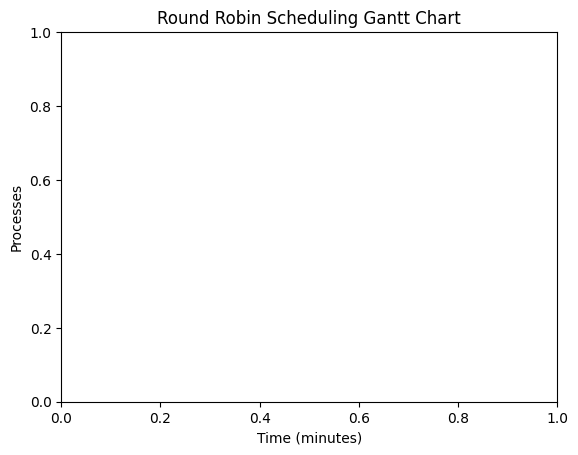

In [15]:
import matplotlib.pyplot as plt
import random
import heapq

def get_user_input():
    n = int(input("Enter the number of processes: "))
    processes = []
    for i in range(n):
        name = input(f"Enter process name for P{i+1}: ")
        arrival_hour = int(input(f"Enter arrival hour for {name} (in 24-hour format): "))
        arrival_minute = int(input(f"Enter arrival minute for {name}: "))
        arrival_time = arrival_hour * 60 + arrival_minute  # Convert to minutes
        burst_time = int(input(f"Enter burst time for {name}: "))
        priority = int(input(f"Enter priority for {name} (lower number = higher priority): "))
        processes.append((name, arrival_time, burst_time, priority))

    quantum = int(input("Enter the time quantum for Round Robin: "))
    return processes, quantum

def fcfs_scheduling(processes):
    processes.sort(key=lambda x: x[1])  # Sort by arrival time
    completion_time, turnaround_time, waiting_time, gantt = [], [], [], []
    current_time = 0

    for name, arrival, burst, _ in processes:
        if current_time < arrival:
            current_time = arrival
        ct = current_time + burst
        gantt.append((name, current_time, ct))
        completion_time.append(ct)
        turnaround_time.append(ct - arrival)
        waiting_time.append(ct - arrival - burst)
        current_time = ct

    return completion_time, turnaround_time, waiting_time, gantt

def sjf_scheduling(processes):
    processes.sort(key=lambda x: (x[1], x[2]))  # Sort by arrival time, then burst time
    remaining = processes.copy()
    completion_time, turnaround_time, waiting_time, gantt = [], [], [], []
    current_time = 0

    while remaining:
        available = [p for p in remaining if p[1] <= current_time]
        if available:
            available.sort(key=lambda x: x[2])  # Sort by burst time
            p = available.pop(0)
            remaining.remove(p)
            name, arrival, burst, _ = p
            ct = current_time + burst
            gantt.append((name, current_time, ct))
            completion_time.append(ct)
            turnaround_time.append(ct - arrival)
            waiting_time.append(ct - arrival - burst)
            current_time = ct
        else:
            current_time += 1

    return completion_time, turnaround_time, waiting_time, gantt

def preemptive_sjf_scheduling(processes):
    remaining_processes = sorted(processes, key=lambda x: x[1])
    ready_queue = []
    current_time = 0
    gantt = []

    while remaining_processes or ready_queue:
        while remaining_processes and remaining_processes[0][1] <= current_time:
            name, arrival, burst, _ = remaining_processes.pop(0)
            heapq.heappush(ready_queue, (burst, arrival, name))

        if ready_queue:
            burst, arrival, name = heapq.heappop(ready_queue)
            gantt.append((name, current_time, current_time + 1))
            current_time += 1
            burst -= 1
            if burst > 0:
                heapq.heappush(ready_queue, (burst, arrival, name))
        else:
            current_time += 1

    return gantt

def priority_scheduling(processes):
    processes.sort(key=lambda x: (x[1], x[3]))  # Sort by arrival time, then priority
    completion_time, turnaround_time, waiting_time, gantt = [], [], [], []
    current_time = 0

    while processes:
        available = [p for p in processes if p[1] <= current_time]
        if available:
            available.sort(key=lambda x: x[3])  # Sort by priority
            p = available.pop(0)
            processes.remove(p)
            name, arrival, burst, priority = p
            ct = current_time + burst
            gantt.append((name, current_time, ct))
            completion_time.append(ct)
            turnaround_time.append(ct - arrival)
            waiting_time.append(ct - arrival - burst)
            current_time = ct
        else:
            current_time += 1

    return completion_time, turnaround_time, waiting_time, gantt

def round_robin_scheduling(processes, quantum):
    queue = []
    time = 0
    remaining_burst = {p[0]: p[2] for p in processes}
    gantt = []
    completion_time = {}
    turnaround_time = {}
    waiting_time = {}

    processes.sort(key=lambda x: x[1])  # Sort by arrival time
    process_index = 0

    while process_index < len(processes) or queue:
        while process_index < len(processes) and processes[process_index][1] <= time:
            queue.append(processes[process_index])
            process_index += 1

        if queue:
            name, arrival, burst, _ = queue.pop(0)
            executed_time = min(quantum, remaining_burst[name])
            remaining_burst[name] -= executed_time
            gantt.append((name, time, time + executed_time))
            time += executed_time

            if remaining_burst[name] > 0:
                queue.append([name, arrival, burst, _])
            else:
                completion_time[name] = time
                turnaround_time[name] = completion_time[name] - arrival
                waiting_time[name] = turnaround_time[name] - burst
        else:
            time += 1  # If no process is ready, move time forward

    return completion_time, turnaround_time, waiting_time, gantt

def rr_draw_gantt_chart(schedule, title):
    fig, ax = plt.subplots()
    colors = {}
    y = 1
    for (pid, start, end) in schedule:
        if pid not in colors:
            colors[pid] = f"#{random.randint(0, 0xFFFFFF):06x}"
        ax.barh(y, end-start, left=start, color=colors[pid], edgecolor='black')
        ax.text((start+end)/2, y, f'{pid}', va='center', ha='center')
        y += 1
    plt.xlabel("Time (minutes)")
    plt.ylabel("Processes")
    plt.title(title)
    plt.show()



def draw_gantt_chart(schedule, title):
    fig, ax = plt.subplots()
    y = 1
    colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in range(len(schedule))]
    for (pid, start, end), color in zip(schedule, colors):
        ax.barh(y, end-start, left=start, color=color, edgecolor='black')
        ax.text((start+end)/2, y, f'{pid}', va='center', ha='center')
        y += 1
    plt.xlabel("Time (minutes)")
    plt.ylabel("Processes")
    plt.title(title)
    plt.show()

# Get user input
processes, quantum = get_user_input()

# Run all scheduling algorithms
fcfs_result = fcfs_scheduling(processes)
sjf_result = sjf_scheduling(processes)
psjf_result = preemptive_sjf_scheduling(processes)
priority_result = priority_scheduling(processes)
rr_result = round_robin_scheduling(processes, quantum)

# Print results
draw_gantt_chart(fcfs_result[3], "FCFS Scheduling Gantt Chart")
draw_gantt_chart(sjf_result[3], "SJF Scheduling Gantt Chart")
draw_gantt_chart(psjf_result, "Preemptive SJF Scheduling Gantt Chart")
draw_gantt_chart(priority_result[3], "Priority Scheduling Gantt Chart")
rr_draw_gantt_chart(rr_result[3], "Round Robin Scheduling Gantt Chart")
